In [144]:
"""Scaling constants k1-k3"""
k1 = 160
k2 = 90
k3 = 55

"""Alpha values"""
a1 = -0.1
a2 = -0.1
a3 = -0.1

"""Epsilon values"""
e1 = 0.01
e2 = 0.01
e3 = 0.01

"""Beta values"""
b1 = 0.05
b2 = 0.02
b3 = 2

"""Coupling constants f"""
f1 = 0.1
f2 = 0
f3 = 0

"""Coupling constants g"""
g1 = 1
g2 = 0
g3 = 0

"""Coupling constants h"""
h1 = 0
h2 = 0
h3 = 0
from scipy.integrate import odeint
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.legend import Legend

#params = [f1, g1, a1, a2, a3, e1, e2, e3, b1, b2, b3]


params=[f1, g1, a1, a2, a3, e1, e2, e3, b1, b2, b3]


def fhn(x, t, params):
    # constants

    f1 = params[0]
    g1 = params[1]
    a1 = params[2]
    a2 = params[3]
    a3 = params[4]
    e1 = params[5]
    e2 = params[6]
    e3 = params[7]
    b1 = params[8]
    b2 = params[9]
    b3 = params[10]

    V1 = x[0]
    R1 = x[1]
    V2 = x[2]
    R2 = x[3]
    V3 = x[4]
    R3 = x[5]

    dV1dt = k1 * (V1 * (a1 - V1) * (V1 - 1) - R1 + f2 * (V1 - V1) + h1 * (V1 - V3))
    #dV1dt = k1*(V1 * (a1 - V1) * (V1 - 1) - R1) + f2*(V1-V2) + h1(V1-V3)
    dR1dt = k1 * (e1 * (V1 - b1 * R1))

    dV2dt = k2 * (V2 * (a2 - V2) * (V2 - 1) - R2 + f1 * (V2 - V1) + g2 * (V2 - V3))
    dR2dt = k2 * (e2 * (V2 - b2 * R2))

    dV3dt = k3 * (V3 * (a3 - V3) * (V3 - 1) - R3 + h2 * (V3 - V1) + g1 * (V3 - V2))
    dR3dt = k3 * (e3 * (V3 - b3 * R3))
    return [dV1dt, dR1dt, dV2dt, dR2dt, dV3dt, dR3dt]


x0 = [0.1, 0, 0.1, 0, 0.1, 0]  # initial conditions
t = np.linspace(1, 20, 1000)  # time
x = odeint(fhn, x0, t, args=(params,))

V1 = x[:, 0]
W1 = x[:, 1]
V2 = x[:, 2]
W2 = x[:, 3]
V3 = x[:, 4]
W3 = x[:, 5]

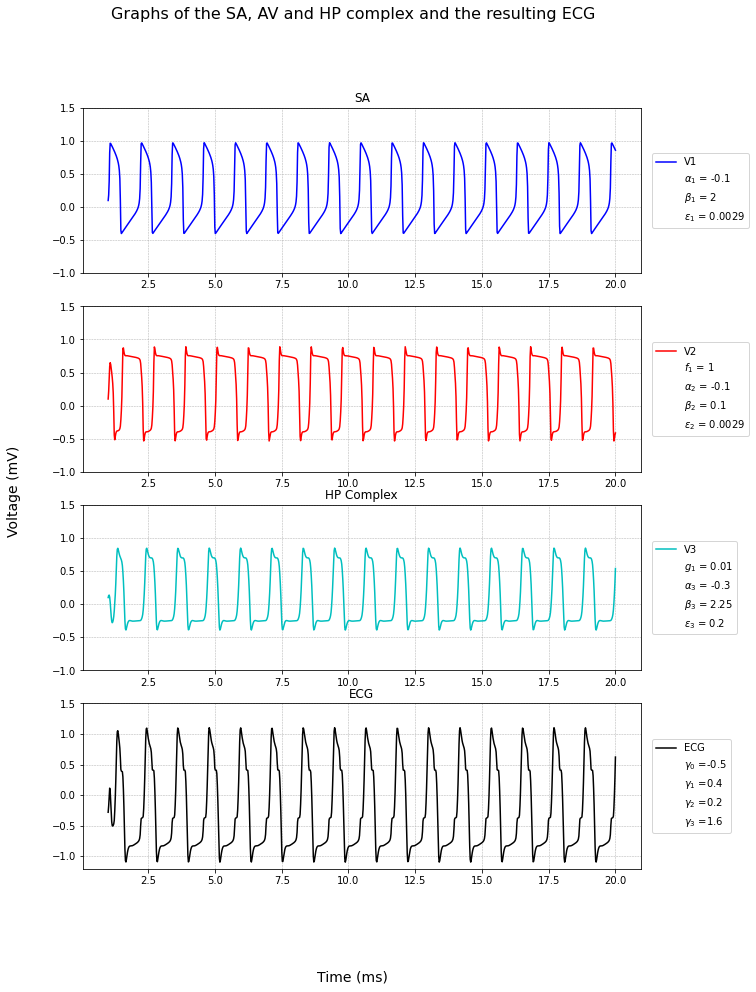

In [145]:
#params = [1, 0.01, -0.1, -0.1, -0.3, 0.0039, 0.0029, 0.2, 2.25, 2.25, 2.25]

##params = [1, 0.01, -0.1, -0.1, -0.3, 0.0039, 0.0129, 0.2, 2.55, 2.25, 2.25]

#params = [0.1, 0.1, -0.1, -0.5, -0.3,0.005500, 0.2, 0.2, 2.25, 2.25, 2.25 ]

params = [0.1, 0.1, -0.1, -0.5, -0.3, 0.005500, 0.2, 0.2, 2.25, 2.25, 2.25]

fig, (ax4, ax5, ax6, ax7) = plt.subplots(4,figsize=(10,14))
plt.suptitle('Graphs of the SA, AV and HP complex and the resulting ECG', fontsize=16)
x10 = odeint(fhn, x0, t,args=(params,))

ax4.title.set_text('SA')
ax4.plot(t,x10[:,0], label=r'V1', color='blue') # V2 label
ax4.plot([ ],[ ],' ',label=r'$\alpha_1$ = -0.1')
ax4.plot([ ],[ ],' ',label=r'$\beta_1$ = 2')
ax4.plot([ ],[ ],' ',label=r'$\epsilon_1$ = 0.0029')
"""Graph for the HP Complex Subplot"""

ax2.title.set_text('AV')
ax5.plot(t,x10[:,2], label=r'V2', color='red') # V2 label
ax5.plot([ ],[ ],' ',label=r'$f_1$ = 1')
ax5.plot([ ],[ ],' ',label=r'$\alpha_2$ = -0.1')
ax5.plot([ ],[ ],' ',label=r'$\beta_2$ = 0.1')
ax5.plot([ ],[ ],' ',label=r'$\epsilon_2$ = 0.0029')
#ax2.plot(t,x3[:,4], label='V3', color='green', linestyle='dashed')  # V3 label


ax6.title.set_text('HP Complex')
ax6.plot(t,x10[:,4], label=r'V3', color='c') # V2 label
ax6.plot([ ],[ ],' ',label=r'$g_1$ = 0.01')
ax6.plot([ ],[ ],' ',label=r'$\alpha_3$ = -0.3')
ax6.plot([ ],[ ],' ',label=r'$\beta_3$ = 2.25')
ax6.plot([ ],[ ],' ',label=r'$\epsilon_3$ = 0.2')

ax7.title.set_text('ECG')
q0 = -0.5
q1 = 0.1*4
q2 = 0.05*4
q3 = 0.4*4

ECG = q0  + q1*x10[:,0]+q2*x10[:,2]+q3*x10[:,4]

ax7.plot(t,ECG, label='ECG', color='k' )  # V3 label
ax7.plot([ ],[ ],' ',label=r'$\gamma_0$ ={}'.format(q0))
ax7.plot([ ],[ ],' ',label=r'$\gamma_1$ ={}'.format(q1))
ax7.plot([ ],[ ],' ',label=r'$\gamma_2$ ={}'.format(q2))
ax7.plot([ ],[ ],' ',label=r'$\gamma_3$ ={}'.format(q3))


ax4.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9.5)
ax5.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9.5)
ax6.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9.5)
ax7.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9.5)

ax4.grid(linestyle='--', linewidth=0.5)
ax5.grid(linestyle='--', linewidth=0.5)
ax6.grid(linestyle='--', linewidth=0.5)
ax7.grid(linestyle='--', linewidth=0.5)

ax4.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])
ax5.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])
ax6.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])
ax7.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])
#plt.subplots_adjust(left=0.1,
#                    bottom=0.1,
#                    right=0.9,
#                    top=0.9,
#                    wspace=0.4,
#                    hspace=0.4)
fig.supylabel('Voltage (mV)', fontsize=14)
fig.supxlabel('Time (ms)', fontsize=14)
fig.savefig('ECG_Plots', bbox_inches="tight", dpi=300)


plt.show()

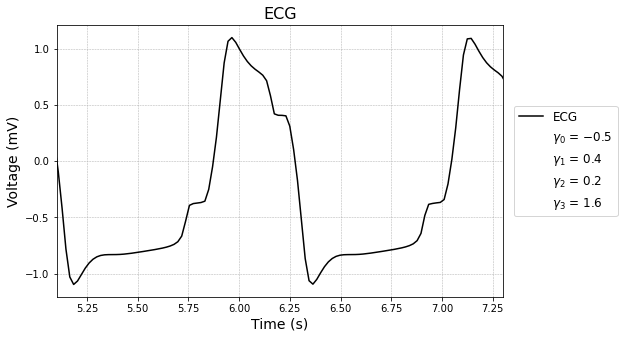

In [146]:

plt.figure(figsize=(8,5))
plt.title("ECG", fontsize=16)
plt.ylabel('Voltage (mV)' , fontsize=14)
plt.xlabel('Time (s)', fontsize=14)
plt.grid(linestyle='--', linewidth=0.5)
plt.plot(t,ECG, label='ECG' ,color='black')
plt.plot([ ],[ ],' ',label='$\gamma_0$ = $-0.5$')
plt.plot([ ],[ ],' ',label='$\gamma_1$ = 0.4')
plt.plot([ ],[ ],' ',label='$\gamma_2$ = 0.2')
plt.plot([ ],[ ],' ',label='$\gamma_3$ = 1.6')
plt.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=6.5, fontsize=12)
plt.xlim(5.1,7.3)

plt.savefig('ECG', bbox_inches="tight", dpi=300)